### FLAGS
### Lab 1
Данные содержат описание флагов разных стран. 
Данные - https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [17]:
url = "C://Users/demon/Desktop/studies/ML/flag.data"
data = pd.read_csv(url, sep = ',', engine='python', header = None)
data.columns = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue','circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']

In [20]:
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


### Описание данных Flag
1. name    (Название) – Название соответствующей страны
2. landmass    (Суша) – 1 = Северная Америка, 2 = Южная Америка, 3 = Европа, 4 = Африка, 4 = Азия, 6 = Океания
3. zone    (Зона) – географический квадрант, основанный на Гринвиче и экваторе; 1 = NE, 2 = SE, 3 = SW, 4 = NW
4. area    (Площадь) – в тысячах квадратных километров
5. population    (Население) – В миллионах 
6. language    (Язык) – 1 = английский, 2 = испанский, 3 = французский, 4 = немецкий, 5 = славянский, 6 = другой индоевропейский, 7 = китайский, 8 = арабский, 9 = японский / турецкий / финский / мадьярский, 10 = Другие 
7. religion    (Религия) – 0 = католик, 1 =другой христианин, 2 = мусульманин, 3 = буддист, 4 = индуист, 5 = этнический, 6 = марксист, 7 = другие
8. bars    (Полосы) –  количество вертикальных полос во флаге
9. stripes    (Полосы) – количество горизонтальных полос на флаге
10. colours    (Цвета) – количество разных цветов на флаге
11. red     –  0 - если красный отсутствует, 1 - если красный присутствует на флаге
12. green     –  аналогично
13. blue     –  аналогично
14. gold     –  аналогично 
15. white    –  аналогично
16. black    –  аналогично
17. orange     –  аналогично
18. mainhue     –  преобладающий цвет в флаге  (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue) 
19. circles    (круги) – количество кружков на флаге
20. crosses    (кресты) – количество (вертикальных) крестов
21. saltires    (Кресты) – количество диагональных крестов
22. quarters     –  количество секций
23. sunstars     –  количество символов солнца или звезды
24. crescent    (Полумесяц) –  1, если присутствует символ полумесяца, иначе 0
25. triangle    (Треугольник) –  1, если есть треугольники, 0 в противном случае
26. icon    (иконки) – 1, если присутствует неодушевленное изображение (например, лодка), в противном случае 0
27. animate    (живое) –  1, если присутствует анимационное(живое) изображение (например, орел, дерево, рука человека), 0 в противном случае
28. text    (текст): 1, если есть какие-либо буквы или надписи на флаге, 0 в противном случае
29. topleft     –  цвет в верхнем левом углу
30. botright     –  цвет в левом нижнем углу

In [22]:
print(data.shape)
print(data.columns)

(194, 30)
Index(['name', 'landmass', 'zone', 'area', 'population', 'language',
       'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue',
       'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses',
       'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon',
       'animate', 'text', 'topleft', 'botright'],
      dtype='object')


In [23]:
data.index


RangeIndex(start=0, stop=194, step=1)

Переименуем числовые признаки категорий на текст, для удобного восприятия информации

In [24]:
new_data=data.copy();

new_data["language"] = new_data["language"].astype('category')
new_data["language"].cat.categories = ['English', 'Spanish', 'French', 'German', 'Slavic', 'Other Indo-European', 'Chinese', 'Arabic', 'Japanese/Turkish/Finnish/Magyar', 'Others']
new_data["religion"] = new_data["religion"].astype('category')
new_data["religion"].cat.categories=['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Others']
new_data["landmass"] = new_data["landmass"].astype('category')
new_data["landmass"].cat.categories=['N.America', 'S.America', 'Europe', 'Africa', 'Asia', 'Oceania']
new_data["zone"] = new_data["zone"].astype('category')
new_data["zone"].cat.categories=['NE', 'SE', 'SW', 'NW']

In [25]:
new_data

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,Asia,NE,648,16,Others,Muslim,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,Europe,NE,29,3,Other Indo-European,Marxist,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,Africa,NE,2388,20,Arabic,Muslim,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,Oceania,SW,0,0,English,Other Christian,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,Europe,NE,0,0,Other Indo-European,Catholic,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,Africa,SE,1247,7,Others,Ethnic,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,N.America,NW,0,0,English,Other Christian,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,N.America,NW,0,0,English,Other Christian,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,S.America,SW,2777,28,Spanish,Catholic,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,S.America,SW,2777,28,Spanish,Catholic,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue


In [26]:
data.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
type(new_data)

pandas.core.frame.DataFrame

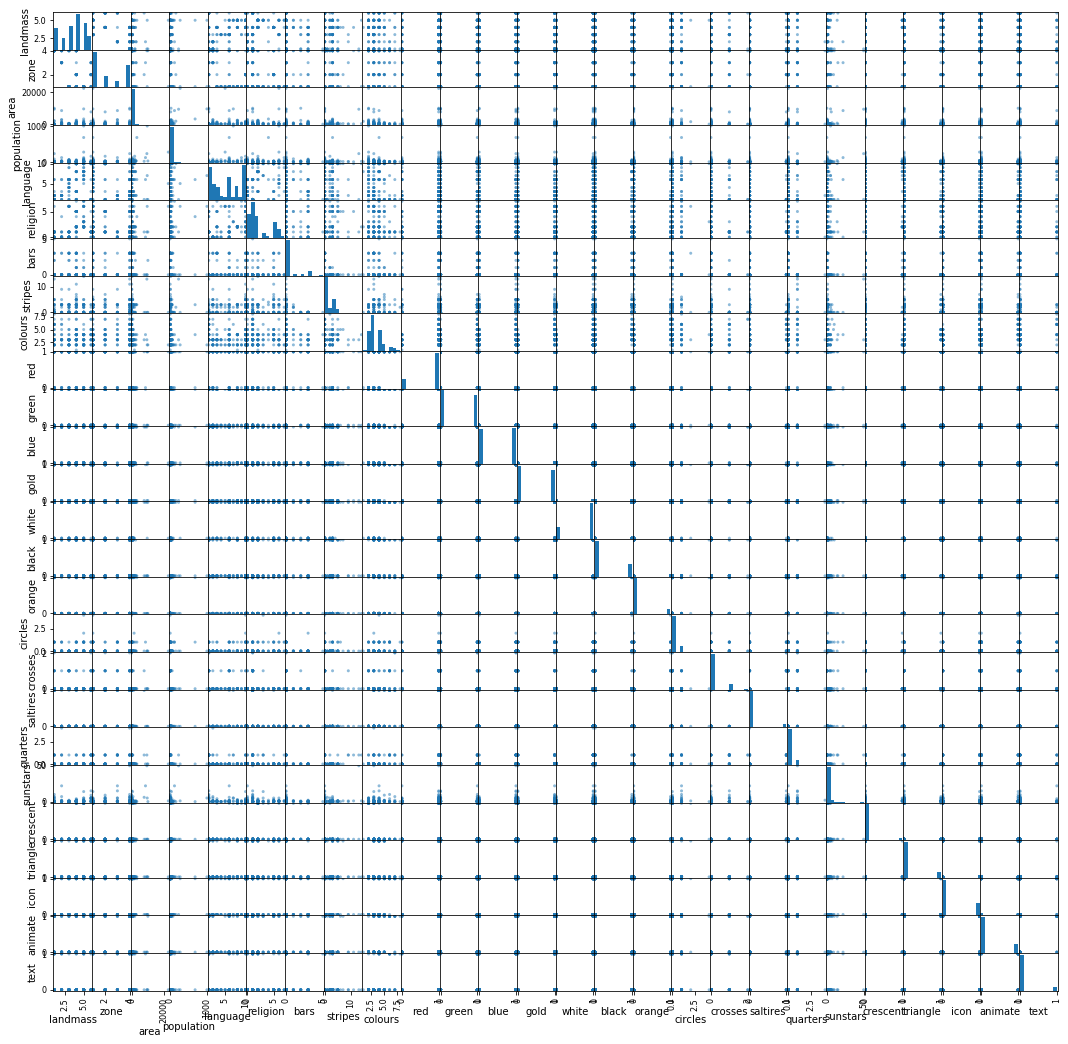

In [40]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .5, figsize = (18, 18))
pass

In [38]:
data.corr()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
landmass,1.000000,-0.615759,0.013279,0.105940,0.496400,0.325073,-0.139290,-0.063375,-0.062856,0.093400,...,0.065696,-0.031103,-0.003429,-0.004537,-0.034843,0.168438,-0.033154,0.030359,-0.118856,-0.110743
zone,-0.615759,1.000000,-0.025431,-0.124111,-0.618387,-0.320537,0.085446,0.002359,0.173567,-0.032269,...,-0.042542,0.101441,0.179667,0.153300,0.121754,-0.159272,0.060416,-0.048692,0.106034,0.037602
area,0.013279,-0.025431,1.000000,0.519030,-0.027869,0.087941,0.001243,0.028454,-0.162227,-0.005470,...,-0.005652,-0.057888,-0.025492,-0.001968,0.340572,-0.005049,-0.075366,0.026593,-0.051539,0.024423
population,0.105940,-0.124111,0.519030,1.000000,0.062804,0.172731,-0.041392,0.030100,-0.115052,-0.024648,...,0.051257,-0.076305,-0.059061,-0.041349,0.191377,-0.015544,-0.078156,0.017966,-0.082259,-0.025194
language,0.496400,-0.618387,-0.027869,0.062804,1.000000,0.422315,-0.049862,0.105409,-0.197883,-0.011048,...,0.098476,-0.210966,-0.296106,-0.220535,-0.126241,0.193375,-0.064845,0.028336,-0.133756,-0.082977
religion,0.325073,-0.320537,0.087941,0.172731,0.422315,1.000000,-0.060000,0.103222,-0.017720,0.121721,...,0.123260,-0.225238,-0.133373,-0.135713,-0.075081,0.053145,0.056868,0.055714,-0.002741,-0.055158
bars,-0.139290,0.085446,0.001243,-0.041392,-0.049862,-0.060000,1.000000,-0.273371,-0.064574,-0.017093,...,-0.096650,-0.144432,-0.140070,-0.150604,-0.114667,0.021743,-0.132973,-0.002598,0.016260,0.067709
stripes,-0.063375,0.002359,0.028454,0.030100,0.105409,0.103222,-0.273371,1.000000,0.038278,0.014210,...,-0.087479,-0.190550,-0.190735,0.091941,0.215486,-0.010242,-0.005719,-0.107426,-0.157922,-0.111564
colours,-0.062856,0.173567,-0.162227,-0.115052,-0.197883,-0.017720,-0.064574,0.038278,1.000000,0.311759,...,0.178062,0.253827,0.378810,0.187861,0.031008,-0.173644,0.143252,0.505614,0.544576,0.398483
red,0.093400,-0.032269,-0.005470,-0.024648,-0.011048,0.121721,-0.017093,0.014210,0.311759,1.000000,...,0.108639,0.102772,0.122031,0.119914,0.019726,-0.091458,0.025760,0.097513,0.133648,0.017507


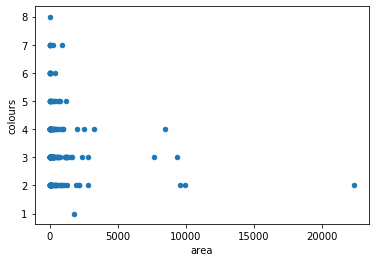

In [44]:
data.plot(x='area',y='colours', kind='scatter')
pass

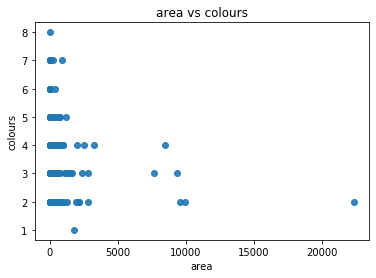

In [47]:
plt.plot(data['area'], data['colours'], 'o', alpha = 0.9)
plt.xlabel('area')
plt.ylabel('colours')
plt.title('area vs colours')
pass

In [51]:
data['language'] == 1

0      False
1      False
2      False
3       True
4      False
5      False
6       True
7       True
8      False
9      False
10      True
11     False
12      True
13     False
14     False
15      True
16     False
17      True
18     False
19      True
20     False
21     False
22     False
23     False
24      True
25     False
26     False
27     False
28     False
29     False
       ...  
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173     True
174    False
175    False
176     True
177     True
178    False
179    False
180     True
181    False
182     True
183     True
184    False
185    False
186    False
187    False
188    False
189     True
190    False
191    False
192    False
193    False
Name: language, Length: 194, dtype: bool

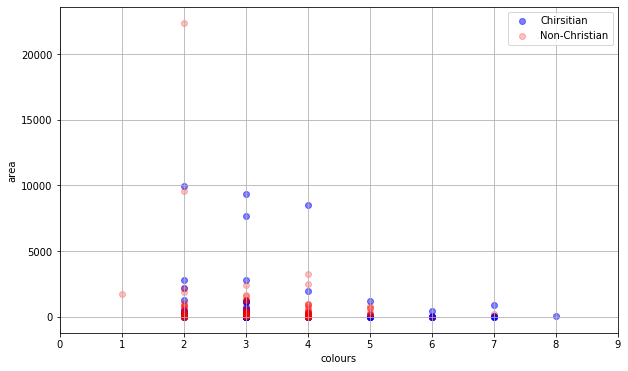

In [59]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['religion'] < 2]['colours'],
            data[data['religion'] < 2]['area'],
            alpha = 0.5,
            label = 'Chirsitian',
            color = 'b')

plt.scatter(data[data['religion'] >= 2]['colours'],
            data[data['religion'] >= 2]['area'],
            alpha = 0.25,
            label = 'Non-Christian',
            color = 'r')

plt.xlabel('colours')
plt.xticks(range(10))
plt.xlim(0, 9)
plt.ylabel('area')
plt.legend()
plt.grid()

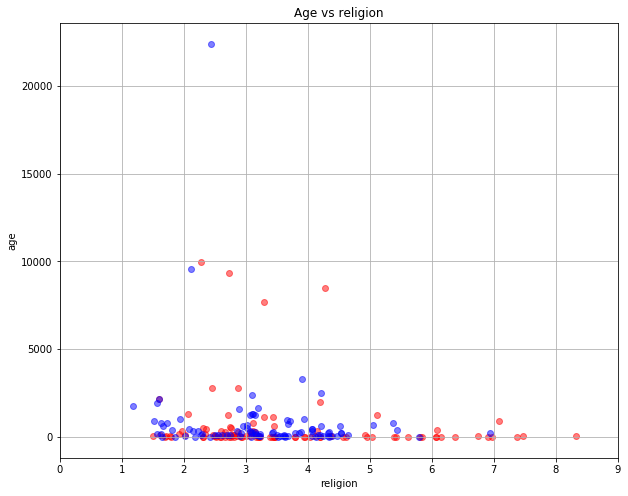

In [60]:
np.random.seed(0)
education_num_rnd = data['colours'] + np.random.rand(data.shape[0]) - .5
education_num_rnd2 = data['area'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data['religion'] < 2],
            education_num_rnd2[data['religion'] < 2],
            alpha = 0.5,
            label = 'Chirsitian',
            color = 'r')

plt.scatter(education_num_rnd[data['religion'] >= 2],
            education_num_rnd2[data['religion'] >= 2],
            alpha = 0.5,
            label = 'Non-Christian',
            color = 'b')

plt.xlabel('religion')
plt.xticks(range(10))
plt.xlim(0, 9)
plt.ylabel('age')
plt.title('Age vs religion')
plt.grid()

In [61]:
data.describe(include = ['object'])


,name,mainhue,topleft,botright
count,194,194,194,194
unique,194,8,7,8
top,Iceland,red,red,red
freq,1,71,56,69


Чтобы функция describe выводила еще и категориальные признаки нужен специальной параметр 

In [62]:
data.describe(include = 'all')

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
count,194,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194,194
unique,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,8
top,Iceland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red,red
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,69
mean,NaN,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,...,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474,NaN,NaN
std,NaN,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,...,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798,NaN,NaN
min,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000,NaN,NaN


In [63]:
new_data['language'].unique()

[Others, Other Indo-European, Arabic, English, Spanish, German, French, Slavic, Chinese, Japanese/Turkish/Finnish/Magyar]
Categories (10, object): [Others, Other Indo-European, Arabic, English, ..., French, Slavic, Chinese, Japanese/Turkish/Finnish/Magyar]

In [64]:
new_data['religion'].unique()

[Muslim, Marxist, Other Christian, Catholic, Ethnic, Buddhist, Hindu, Others]
Categories (8, object): [Muslim, Marxist, Other Christian, Catholic, Ethnic, Buddhist, Hindu, Others]

In [90]:
for name in new_data['religion'].unique():
    print(name, data['religion'][new_data['religion'] == name].iloc[0])

Muslim 2
Marxist 6
Other Christian 1
Catholic 0
Ethnic 5
Buddhist 3
Hindu 4
Others 7


### Задача и подготовка данных

In [91]:
data = data.drop('name', axis = 1)
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']

In [92]:
print(categorical_columns)
print(numerical_columns)

['mainhue', 'topleft', 'botright']
['landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text']


In [93]:
for c in categorical_columns:
    print(c, data[c].unique())

mainhue ['green' 'red' 'blue' 'gold' 'white' 'orange' 'black' 'brown']
topleft ['black' 'red' 'green' 'blue' 'white' 'orange' 'gold']
botright ['green' 'red' 'white' 'black' 'blue' 'gold' 'orange' 'brown']


In [95]:
data[numerical_columns].count(axis = 0)

landmass      194
zone          194
area          194
population    194
language      194
religion      194
bars          194
stripes       194
colours       194
red           194
green         194
blue          194
gold          194
white         194
black         194
orange        194
circles       194
crosses       194
saltires      194
quarters      194
sunstars      194
crescent      194
triangle      194
icon          194
animate       194
text          194
dtype: int64

Пропусков нет

In [105]:

data.at[data['religion'] < 2, 'religion'] = 0
data.at[data['religion'] >= 2, 'religion'] = 1

In [106]:
data

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,5,1,648,16,10,1,0,3,5,1,...,0,0,1,0,0,1,0,0,black,green
1,3,1,29,3,6,1,0,0,3,1,...,0,0,1,0,0,0,1,0,red,red
2,4,1,2388,20,8,1,2,0,3,1,...,0,0,1,1,0,0,0,0,green,white
3,6,3,0,0,1,0,0,0,5,1,...,0,0,0,0,1,1,1,0,blue,red
4,3,1,0,0,6,0,3,0,3,1,...,0,0,0,0,0,0,0,0,blue,red
5,4,2,1247,7,10,1,0,2,3,1,...,0,0,1,0,0,1,0,0,red,black
6,1,4,0,0,1,0,0,1,3,0,...,0,0,0,0,0,0,1,0,white,blue
7,1,4,0,0,1,0,0,1,5,1,...,0,0,1,0,1,0,0,0,black,red
8,2,3,2777,28,2,0,0,3,2,0,...,0,0,0,0,0,0,0,0,blue,blue
9,2,3,2777,28,2,0,0,3,3,0,...,0,0,1,0,0,0,0,0,blue,blue


### Векторизация

In [112]:
data_describe = data.describe(include = [object])


In [116]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['mainhue', 'topleft', 'botright']


In [114]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['mainhue_black', 'mainhue_blue', 'mainhue_brown', 'mainhue_gold',
       'mainhue_green', 'mainhue_orange', 'mainhue_red', 'mainhue_white',
       'topleft_black', 'topleft_blue', 'topleft_gold', 'topleft_green',
       'topleft_orange', 'topleft_red', 'topleft_white', 'botright_black',
       'botright_blue', 'botright_brown', 'botright_gold', 'botright_green',
       'botright_orange', 'botright_red', 'botright_white'],
      dtype='object')


### Нормализация

In [117]:
data_numerical = data[numerical_columns]
religion = data_numerical['religion']
data_numerical = data_numerical.drop('religion',axis=1)
data_numerical.describe()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,0.453608,1.551546,3.463918,0.788660,0.469072,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,1.038339,2.328005,1.300154,0.409315,0.500334,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,0.000000,3.000000,4.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,5.000000,14.000000,8.000000,1.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [119]:
data_numerical.describe()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,...,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02
mean,-7.840235e-17,-1.762622e-16,2.947242e-17,-2.789865e-17,1.007213e-16,-5.408045e-17,-8.698655e-17,-6.523991e-17,8.011919e-18,-3.433679e-17,...,1.121669e-16,-9.728758e-18,2.346348e-17,-7.153499e-17,-2.332041e-17,1.742592e-16,-6.638447e-17,5.951711e-17,-6.638447e-17,4.807151e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.656237e+00,-9.259072e-01,-3.224641e-01,-2.530948e-01,-1.241294e+00,-4.368596e-01,-6.664703e-01,-1.895096e+00,-1.926778e+00,-9.375186e-01,...,-3.673339e-01,-3.878817e-01,-3.189758e-01,-3.429647e-01,-3.154093e-01,-2.445393e-01,-4.010527e-01,-5.798182e-01,-5.003158e-01,-2.990390e-01
25%,-3.684214e-01,-9.259072e-01,-3.183184e-01,-2.530948e-01,-9.552954e-01,-4.368596e-01,-6.664703e-01,-3.568173e-01,5.163260e-01,-9.375186e-01,...,-3.673339e-01,-3.878817e-01,-3.189758e-01,-3.429647e-01,-3.154093e-01,-2.445393e-01,-4.010527e-01,-5.798182e-01,-5.003158e-01,-2.990390e-01
50%,2.754863e-01,-1.615413e-01,-2.713339e-01,-2.095854e-01,1.887003e-01,-4.368596e-01,-6.664703e-01,-3.568173e-01,5.163260e-01,-9.375186e-01,...,-3.673339e-01,-3.878817e-01,-3.189758e-01,-3.429647e-01,-3.154093e-01,-2.445393e-01,-4.010527e-01,-5.798182e-01,-5.003158e-01,-2.990390e-01
75%,9.193940e-01,1.367191e+00,-1.053911e-01,-1.008118e-01,1.046697e+00,-4.368596e-01,6.221865e-01,4.123222e-01,5.163260e-01,1.061147e+00,...,-3.673339e-01,-3.878817e-01,-3.189758e-01,-3.429647e-01,-8.793939e-02,-2.445393e-01,-4.010527e-01,1.141887e+00,-5.003158e-01,-2.990390e-01
max,1.563302e+00,1.367191e+00,9.996626e+00,1.071128e+01,1.332696e+00,4.378524e+00,5.347262e+00,3.488880e+00,5.163260e-01,1.061147e+00,...,8.270578e+00,4.801708e+00,3.118874e+00,8.834297e+00,1.105809e+01,4.068244e+00,2.480585e+00,1.715788e+00,1.988435e+00,3.326808e+00


### Соединяем все в одну таблицу

In [120]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns],data['religion']), axis = 1)
print(data.shape)

(194, 49)


In [121]:
data.describe()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,...,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white,religion
count,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,-7.840235e-17,-1.762622e-16,2.947242e-17,-2.789865e-17,1.007213e-16,-5.408045e-17,-8.698655e-17,-6.523991e-17,8.011919e-18,-3.433679e-17,...,0.211340,0.046392,0.242268,0.010309,0.046392,0.206186,0.005155,0.355670,0.087629,0.484536
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.409315,0.210876,0.429564,0.101271,0.210876,0.405612,0.071796,0.479954,0.283486,0.501054
min,-1.656237e+00,-9.259072e-01,-3.224641e-01,-2.530948e-01,-1.241294e+00,-4.368596e-01,-6.664703e-01,-1.895096e+00,-1.926778e+00,-9.375186e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.684214e-01,-9.259072e-01,-3.183184e-01,-2.530948e-01,-9.552954e-01,-4.368596e-01,-6.664703e-01,-3.568173e-01,5.163260e-01,-9.375186e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.754863e-01,-1.615413e-01,-2.713339e-01,-2.095854e-01,1.887003e-01,-4.368596e-01,-6.664703e-01,-3.568173e-01,5.163260e-01,-9.375186e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.193940e-01,1.367191e+00,-1.053911e-01,-1.008118e-01,1.046697e+00,-4.368596e-01,6.221865e-01,4.123222e-01,5.163260e-01,1.061147e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.563302e+00,1.367191e+00,9.996626e+00,1.071128e+01,1.332696e+00,4.378524e+00,5.347262e+00,3.488880e+00,5.163260e-01,1.061147e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### X и y

In [122]:
X = data.drop(('religion'), axis = 1) 
y = data['religion']
feature_names = X.columns

In [123]:
type(feature_names)

pandas.core.indexes.base.Index

In [124]:
print(X.shape)
print(y.shape)
N, d = X.shape

(194, 48)
(194,)


In [125]:
type(X)

pandas.core.frame.DataFrame

In [126]:
type(y)

pandas.core.series.Series

Разбиваем данные на тестовую и обучающую выборки.

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

135 59


In [128]:
135+59

194

In [129]:
type(y_train)

pandas.core.series.Series